Employee Attrition Prediction Project


**1.Attrition in an Organization || Why Employees leave ?**                                        

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:



1.Expensive in terms of both money and time to train new employees.

2.Loss of experienced employees

3.Impact in productivity

4.Impact profit



**Importing Libraries and Setting Display Options**

This section imports essential libraries for data manipulation and visualization, including Pandas, NumPy, Matplotlib, Seaborn. The %matplotlib inline magic command enables Matplotlib plots to be displayed inline within the notebook.

The Seaborn and Matplotlib styles are set to "whitegrid" and "fivethirtyeight", respectively, to customize the visualization aesthetics.

Additionally, Pandas display options are configured to format floating-point numbers with two decimal places and to display a maximum of 80 columns and rows when viewing DataFrames.

In [91]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns",20 )
pd.set_option("display.max_rows",20 )
#https://www.mdpi.com/2073-431X/9/4/86
#https://www.mdpi.com/2076-3417/12/13/6424

Let's dive into the actual project:

# New Section

**Loading the Dataset**

In this segment, the code utilizes the Pandas library to read a CSV file containing employee attrition data into a DataFrame named dfExploratory Data Analysis**

In [92]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

pd.set_option('display.max_columns',None)
#to have a glimpse of all columns
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [93]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

luckily we have non-null values in our dataset, that saves time for diving deep in analysis of our data.

We have total of 35 columns in our dataset,in which we have 26 integer based columns, and rest are objects


In [95]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [96]:
df.shape

(1470, 35)

The shape tells that our dataset has 1470 rows and 35 columns

In [97]:
for column in df.columns:
  print(f"{column}:{df[column].unique()}")
  print("__________________________________________________________________________________")


Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
__________________________________________________________________________________
Attrition:['Yes' 'No']
__________________________________________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
__________________________________________________________________________________
DailyRate:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  87

We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [98]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [99]:
df.shape

(1470, 31)

**Identifying and Analyzing Object Columns with Limited Unique Values**

**Categorical Features**

In [100]:

object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 20:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [101]:
len(object_col)

7

In [102]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


**Numerical Values**

In [103]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("_________________________________________________________________")
disc_col.remove('Attrition')

Attrition : [1 0]
_________________________________________________________________
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
_________________________________________________________________
Education : [2 1 4 3 5]
_________________________________________________________________
EnvironmentSatisfaction : [2 3 4 1]
_________________________________________________________________
JobInvolvement : [3 2 4 1]
_________________________________________________________________
JobLevel : [2 1 3 4 5]
_________________________________________________________________
JobSatisfaction : [4 2 3 1]
_________________________________________________________________
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
_________________________________________________________________
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
_________________________________________________________________
PerformanceRating : [3 4]
_____

In [104]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("______________________________________________________________________")

Age : Minimum: 18, Maximum: 60
______________________________________________________________________
DailyRate : Minimum: 102, Maximum: 1499
______________________________________________________________________
HourlyRate : Minimum: 30, Maximum: 100
______________________________________________________________________
MonthlyIncome : Minimum: 1009, Maximum: 19999
______________________________________________________________________
MonthlyRate : Minimum: 2094, Maximum: 26999
______________________________________________________________________
TotalWorkingYears : Minimum: 0, Maximum: 40
______________________________________________________________________
YearsAtCompany : Minimum: 0, Maximum: 40
______________________________________________________________________


#**Data VIsualization**

In [105]:

df["Attrition"].value_counts()

,count
Attrition,
0,1233
1,237


<Axes: xlabel='Attrition'>

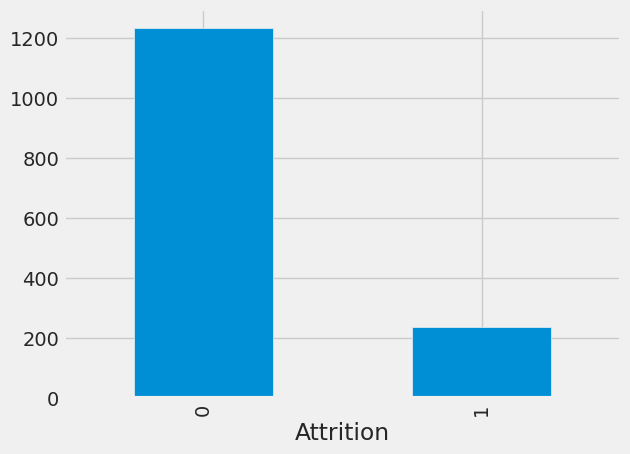

In [106]:
df['Attrition'].value_counts().plot(kind='bar')

In [107]:
#Correlation between features
cols= df.columns
target = df['Attrition']
cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [108]:
#Correlation  Matrix
X = df[cols[:]]
# Select only numeric columns for correlation calculation
numerical_cols = X.select_dtypes(include=np.number).columns
X_numeric = X[numerical_cols]
X_numeric.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WorkLifeBalance,-0.021490,-0.063939,-0.037848,-0.026556,0.009819,0.027627,-0.004607,-0.014617,0.037818,-0.019459,0.030683,0.007963,-0.008366,-0.003280,0.002572,0.019604,0.004129,0.001008,0.028072,1.000000,0.012089,0.049856,0.008941,0.002759
YearsAtCompany,0.311309,-0.134392,-0.034055,0.009508,0.069114,0.001458,-0.019582,-0.021355,0.534739,-0.003803,0.514285,-0.023655,-0.118421,-0.035991,0.003435,0.019367,0.015058,0.628133,0.003569,0.012089,1.000000,0.758754,0.618409,0.769212
YearsInCurrentRole,0.212901,-0.160545,0.009932,0.018845,0.060236,0.018007,-0.024106,0.008717,0.389447,-0.002305,0.363818,-0.012815,-0.090754,-0.001520,0.034986,-0.015123,0.050818,0.460365,-0.005738,0.049856,0.758754,1.000000,0.548056,0.714365
YearsSinceLastPromotion,0.216513,-0.033019,-0.033229,0.010029,0.054254,0.016194,-0.026716,-0.024184,0.353885,-0.018214,0.344978,0.001567,-0.036814,-0.022154,0.017896,0.033493,0.014352,0.404858,-0.002067,0.008941,0.618409,0.548056,1.000000,0.510224


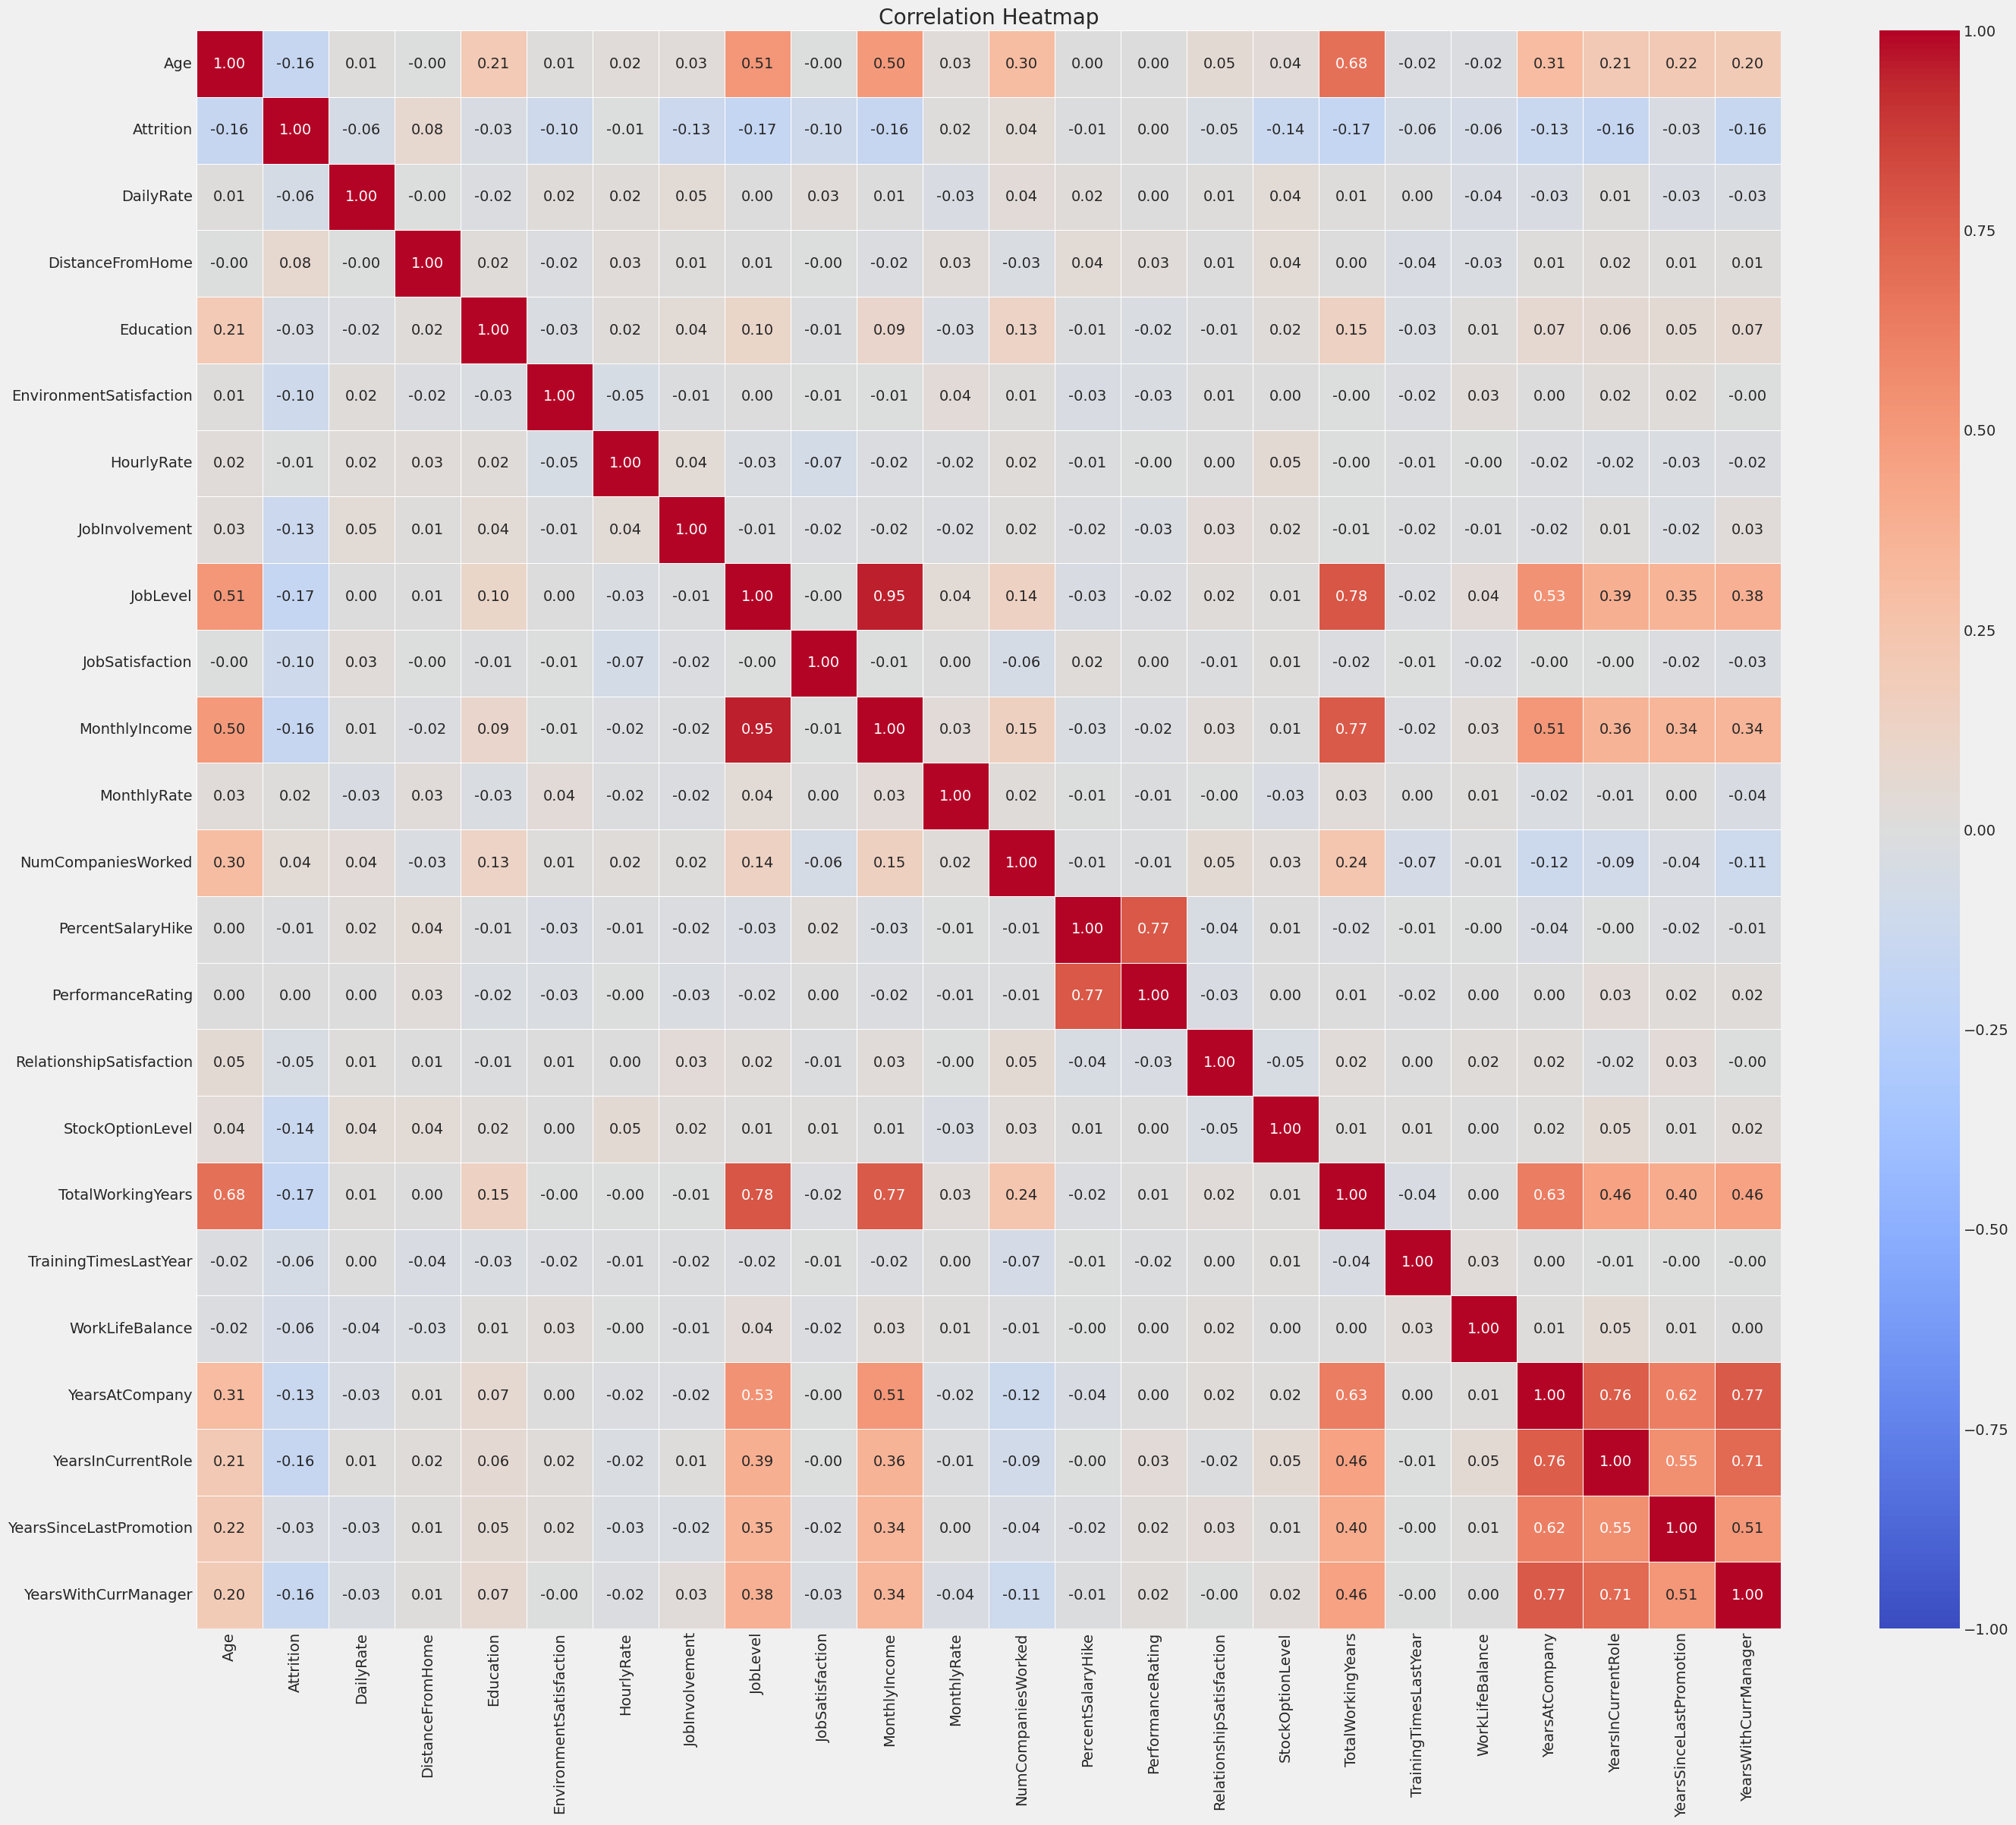

In [109]:
#HEAT MAP
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_numeric.corr()

# Create a heatmap
plt.figure(figsize=(30,26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [110]:
!pip install hvplot
#pd.crosstab(df['Attrition'], df['DistanceFromHome']).plot(kind='bar')

In [111]:
import hvplot.pandas

In [112]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [113]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [114]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [115]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [116]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [117]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [118]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [119]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [120]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [121]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [122]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [123]:
df.hvplot.hist(y='MonthlyRate', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyRate]   (Count)

**It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees**

In [124]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

Text(0, 0.5, 'Frequency')

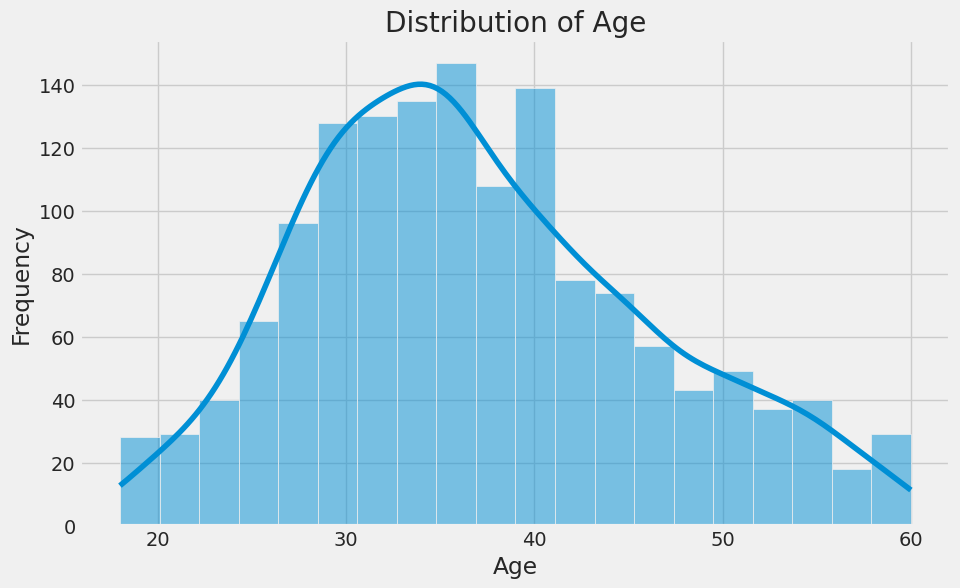

In [125]:
#distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [126]:
import hvplot.pandas

attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().unstack()
attrition_by_gender.hvplot.bar(
    rot=45, height=500, width=600, title="Attrition by Gender"
)

:Bars   [Gender,Attrition]   (value)

In [127]:
#The reason for using the hvplot was this plot ,while using simple histogram it was hard to visualize evyerthing was kind off congested
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

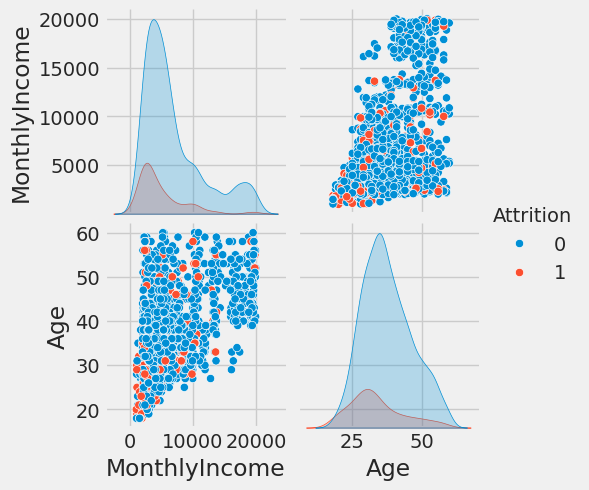

In [128]:
# prompt: generate pair plot of monthly income and age with respect to attrition

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=["MonthlyIncome", "Age"], hue="Attrition")
plt.show()

In [129]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [130]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

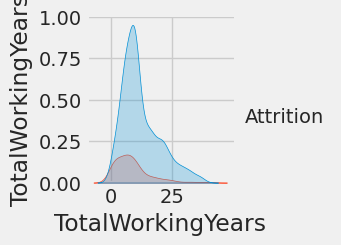

In [131]:

import matplotlib.pyplot as plt
sns.pairplot(df, vars=["TotalWorkingYears"], hue="Attrition")
plt.show()


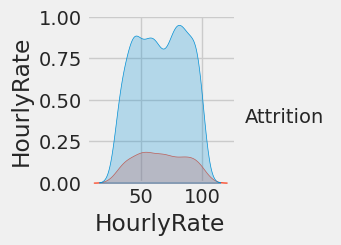

In [132]:

sns.pairplot(df, vars=["HourlyRate"], hue="Attrition")
plt.show()

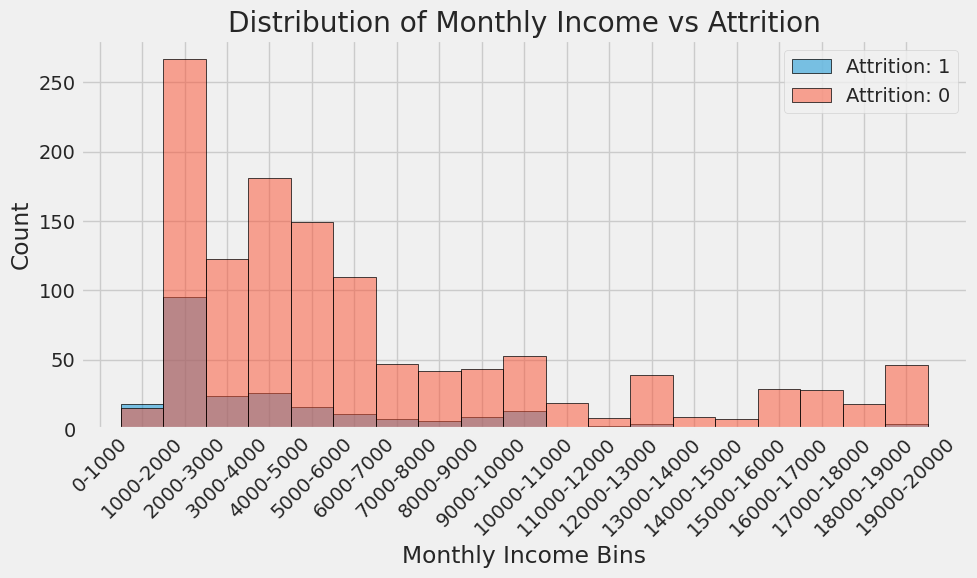

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define salary bins
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000',
          '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000']

# Create a new column for binned salary
df['salary_bin'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(10, 6))
for attrition_status in df['Attrition'].unique():
    subset = df[df['Attrition'] == attrition_status]
    # Plotting the histogram using the binned salary
    sns.histplot(data=subset, x='salary_bin', discrete=True, stat='count', alpha=0.5, label=f'Attrition: {attrition_status}', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Monthly Income vs Attrition")
plt.xlabel("Monthly Income Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Our Takeaways from visualization**

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

# OverSampling

In [134]:
from imblearn.over_sampling import RandomOverSampler

# Separating features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']


# Creating an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)


# Applying oversampling to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Creating a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled.head()
df=pd.DataFrame(df_resampled)
df['Attrition'].value_counts()

,count
Attrition,
1,1233
0,1233


<Axes: xlabel='Attrition'>

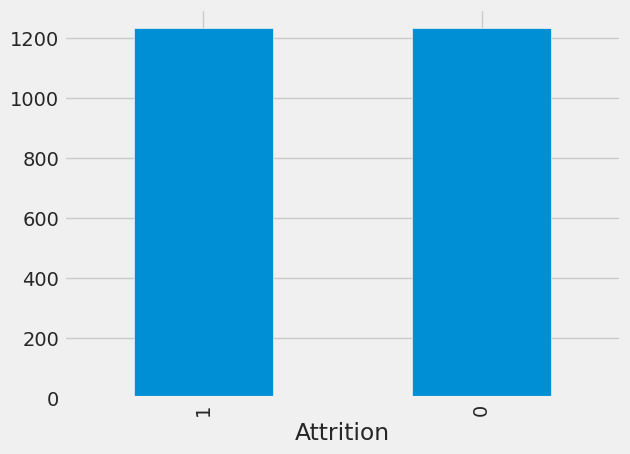

In [135]:
df['Attrition'].value_counts().plot(kind='bar')

# Feature Encoding

Changing categorical columns values into integer values.

In [136]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Applying label encoding to each categorical column
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,salary_bin,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,5000-6000,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,5000-6000,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2000-3000,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,2000-3000,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,3000-4000,0


# Applying Model
We have applied 3 classification model:
1. Random Forest
2. Naive Bayes Classification
3. Decision Tree

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame after preprocessing (as in your provided code)

# Define features (X) and target (y)
X = df.drop(['Attrition', 'salary_bin'], axis=1) # Drop 'salary_bin' column
y = df['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Random Forest: {accuracy_rf}%")


Accuracy of Random Forest: 95.1417004048583%


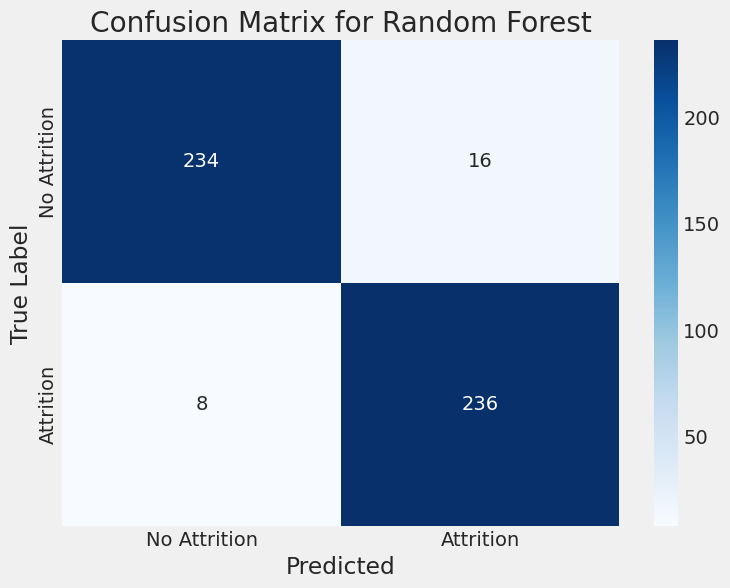

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       250
           1       0.94      0.97      0.95       244

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop('Attrition', axis=1)
X = X.drop('salary_bin', axis=1)
y = df['Attrition']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating a Naive Bayes classifier
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluating the model's accuracy
accuracy_nb= accuracy_score(y_test, y_pred) * 100
print(f"Accuracy of Naive Bayes: {accuracy_nb} %")

Accuracy of Naive Bayes: 64.82982171799027 %


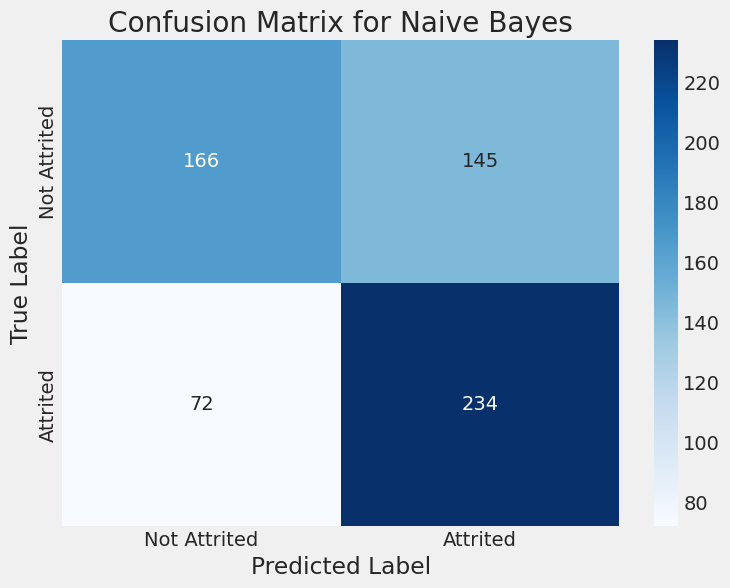

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       311
           1       0.62      0.76      0.68       306

    accuracy                           0.65       617
   macro avg       0.66      0.65      0.64       617
weighted avg       0.66      0.65      0.64       617



In [141]:
# Generating the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop('Attrition', axis=1)
X=df.drop('salary_bin', axis=1)
y = df['Attrition']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

# Creating a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Training the model
clf.fit(X_train, y_train)

# Make=ing predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred)*100
print(f"Accuracy of Decision tree: {accuracy_dt} %")

Accuracy of Decision tree: 100.0 %


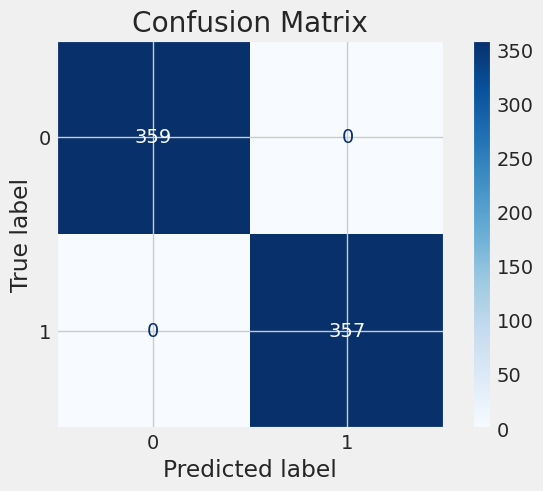

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       357

    accuracy                           1.00       716
   macro avg       1.00      1.00      1.00       716
weighted avg       1.00      1.00      1.00       716



In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a display object for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [144]:

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# ... (Your existing code)

X = df.drop('Attrition', axis=1)
X = X.drop('salary_bin', axis=1)
y = df['Attrition']

# Define the number of folds for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Decision Tree Classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
acc_decisionTree = average_accuracy * 100
print(f"Decision Tree\nAverage accuracy across {n_splits} folds: {acc_decisionTree}%")

Decision Tree
Average accuracy across 5 folds: 92.01230177956985%


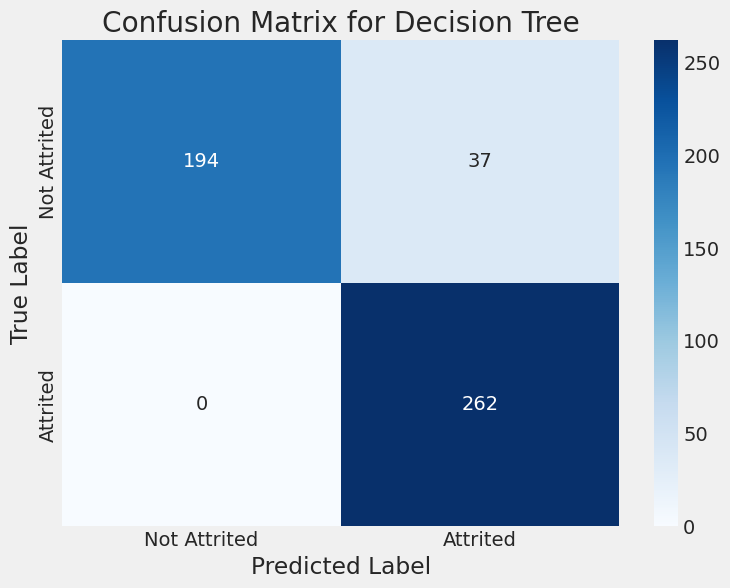

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       231
           1       0.88      1.00      0.93       262

    accuracy                           0.92       493
   macro avg       0.94      0.92      0.92       493
weighted avg       0.93      0.92      0.92       493



In [145]:
# Assuming y_test and y_pred are defined from your Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Attrited', 'Attrited'],
            yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

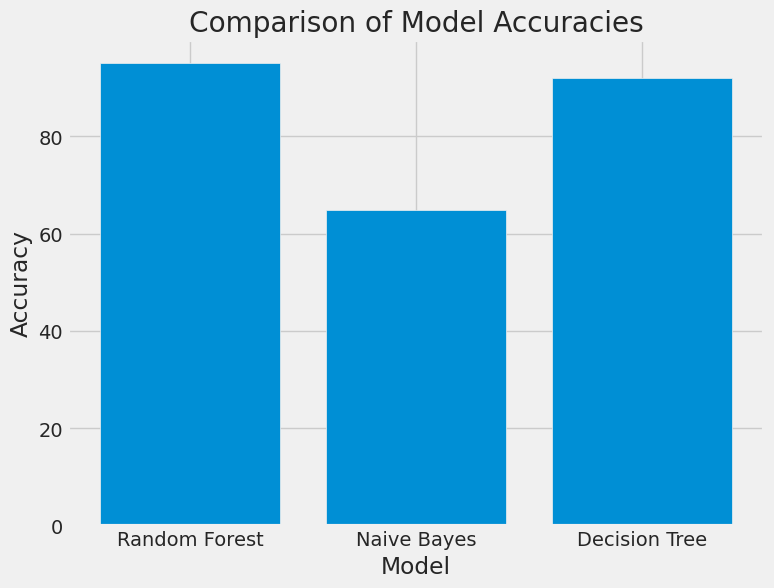

In [146]:
# Comparing the results of the different models visually by creating a bar chart showing the accuracy of each model.

model_names = ['Random Forest', 'Naive Bayes','Decision Tree']
accuracies = [accuracy_rf, accuracy_nb, acc_decisionTree]
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()